In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("creditcard.csv")
print("Dataset loaded. Shape:", df.shape)
print("Class distribution:\n", df['Class'].value_counts())

Dataset loaded. Shape: (284807, 31)
Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
X = df.drop(columns=['Class', 'Time'])
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print("Train class distribution:\n", pd.Series(y_train).value_counts())
print("Test class distribution:\n", pd.Series(y_test).value_counts())

Train shape: (213605, 29), Test shape: (71202, 29)
Train class distribution:
 Class
0    213236
1       369
Name: count, dtype: int64
Test class distribution:
 Class
0    71079
1      123
Name: count, dtype: int64


In [7]:
resampling_method = None
try:
    from imblearn.over_sampling import SMOTE
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_train, y_train)
    resampling_method = "SMOTE (oversampling)"
except Exception as e:
    try:
        from imblearn.under_sampling import RandomUnderSampler
        rus = RandomUnderSampler(random_state=42)
        X_res, y_res = rus.fit_resample(X_train, y_train)
        resampling_method = "RandomUnderSampler (undersampling)"
    except Exception as e2:
        X_res, y_res = X_train, y_train
        resampling_method = "None (will use class_weight='balanced')"

print("Resampling method used:", resampling_method)
print("Resampled train distribution:\n", pd.Series(y_res).value_counts())

Resampling method used: None (will use class_weight='balanced')
Resampled train distribution:
 Class
0    213236
1       369
Name: count, dtype: int64


In [8]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42, n_jobs=-1)
}

trained = {}
results = {}

for name, model in models.items():
    model.fit(X_res, y_res)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    report = classification_report(y_test, y_pred, digits=4)
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label=1)
    results[name] = {
        'report': report,
        'confusion_matrix': cm,
        'roc_auc': roc_auc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'y_proba': y_proba
    }
    trained[name] = model
    print(f"\n==== {name} ====")
    print(report)
    print("Confusion matrix:\n", cm)
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")


==== LogisticRegression ====
              precision    recall  f1-score   support

           0     0.9998    0.9762    0.9879     71079
           1     0.0606    0.8862    0.1134       123

    accuracy                         0.9761     71202
   macro avg     0.5302    0.9312    0.5506     71202
weighted avg     0.9982    0.9761    0.9864     71202

Confusion matrix:
 [[69389  1690]
 [   14   109]]
Precision: 0.0606, Recall: 0.8862, F1: 0.1134, ROC-AUC: 0.9728

==== RandomForest ====
              precision    recall  f1-score   support

           0     0.9995    1.0000    0.9997     71079
           1     0.9677    0.7317    0.8333       123

    accuracy                         0.9995     71202
   macro avg     0.9836    0.8658    0.9165     71202
weighted avg     0.9995    0.9995    0.9995     71202

Confusion matrix:
 [[71076     3]
 [   33    90]]
Precision: 0.9677, Recall: 0.7317, F1: 0.8333, ROC-AUC: 0.9532


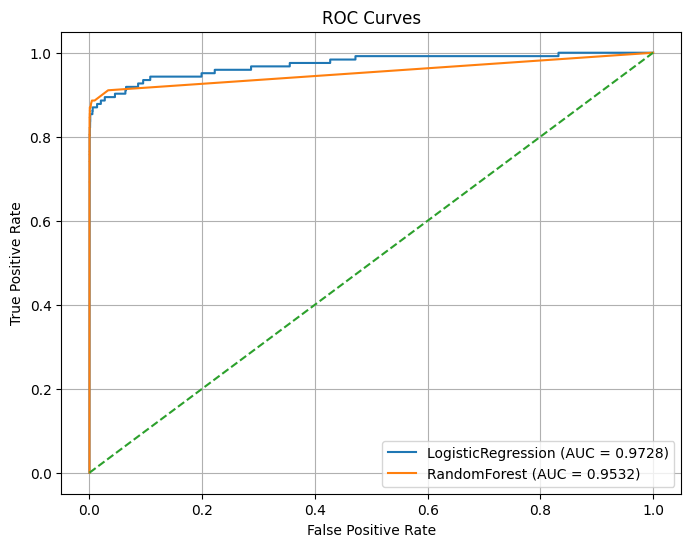

In [9]:
plt.figure(figsize=(8,6))
for name, res in results.items():
    fpr, tpr, _ = roc_curve(y_test, res['y_proba'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.4f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
best_model_name = max(results.keys(), key=lambda k: results[k]['f1'])
print(f"Recommended model (by F1 on fraud class): {best_model_name}")
print("Full metrics for recommended model:")
print(results[best_model_name]['report'])
print("Confusion matrix:\n", results[best_model_name]['confusion_matrix'])
print(f"Precision: {results[best_model_name]['precision']:.4f}")
print(f"Recall:    {results[best_model_name]['recall']:.4f}")
print(f"F1-score:  {results[best_model_name]['f1']:.4f}")
print(f"ROC-AUC:   {results[best_model_name]['roc_auc']:.4f}")

import joblib

model_path = "best_fraud_model.joblib"   # FIXED PATH
joblib.dump(trained[best_model_name], model_path)

print(f"Saved best model to {model_path}")


Recommended model (by F1 on fraud class): RandomForest
Full metrics for recommended model:
              precision    recall  f1-score   support

           0     0.9995    1.0000    0.9997     71079
           1     0.9677    0.7317    0.8333       123

    accuracy                         0.9995     71202
   macro avg     0.9836    0.8658    0.9165     71202
weighted avg     0.9995    0.9995    0.9995     71202

Confusion matrix:
 [[71076     3]
 [   33    90]]
Precision: 0.9677
Recall:    0.7317
F1-score:  0.8333
ROC-AUC:   0.9532
Saved best model to best_fraud_model.joblib
